In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

# fix CUDNN_STATUS_INTERNAL_ERROR
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

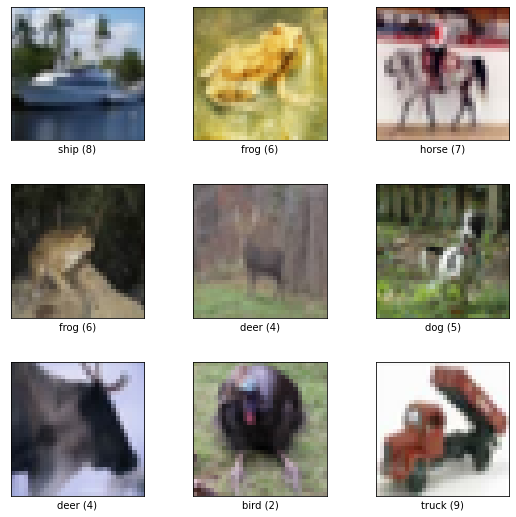

In [2]:
# Source:
# https://www.tensorflow.org/datasets/keras_example

(ds_train, ds_test), ds_info = tfds.load(
    'cifar10', # 'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

_ = tfds.show_examples(ds_train, ds_info)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [3]:
# CNN that achieves decent accuracy
# Layers and initializers used:
# https://keras.io/api/layers/convolution_layers/convolution2d/
# https://keras.io/api/layers/pooling_layers/max_pooling2d/
# https://keras.io/api/layers/normalization_layers/batch_normalization/
# https://keras.io/api/layers/reshaping_layers/flatten/
# https://keras.io/api/layers/core_layers/dense/
# https://keras.io/api/layers/initializers/

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=5,
                           padding='same', activation='relu',
                           kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5,
                           padding='same', activation='relu',
                           kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,
                          kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.01)),
    tf.keras.layers.Softmax()
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.fit(
    ds_train,
    epochs=5,
    validation_data=ds_test,
)

Epoch 1/5
391/391 [==============================] - 13s 32ms/step - loss: 1.3251 - sparse_categorical_accuracy: 0.5296 - val_loss: 2.0029 - val_sparse_categorical_accuracy: 0.3236
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 0.9408 - sparse_categorical_accuracy: 0.6699 - val_loss: 0.9470 - val_sparse_categorical_accuracy: 0.6703
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 0.7551 - sparse_categorical_accuracy: 0.7343 - val_loss: 1.1216 - val_sparse_categorical_accuracy: 0.6207
Epoch 4/5
391/391 [==============================] - 2s 5ms/step - loss: 0.6056 - sparse_categorical_accuracy: 0.7881 - val_loss: 1.0943 - val_sparse_categorical_accuracy: 0.6423
Epoch 5/5
391/391 [==============================] - 2s 5ms/step - loss: 0.4639 - sparse_categorical_accuracy: 0.8395 - val_loss: 1.0351 - val_sparse_categorical_accuracy: 0.6850


In [ ]:
# Unnecessarily deep neural net
# This will take awhile to train and not do that well

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.fit(
    ds_train,
    epochs=5,
    validation_data=ds_test,
)

Epoch 1/5
391/391 [==============================] - 8s 20ms/step - loss: 2.2778 - sparse_categorical_accuracy: 0.2818 - val_loss: 2.5661 - val_sparse_categorical_accuracy: 0.2379
Epoch 2/5
391/391 [==============================] - 8s 20ms/step - loss: 1.9373 - sparse_categorical_accuracy: 0.3453 - val_loss: 2.1235 - val_sparse_categorical_accuracy: 0.2749
Epoch 3/5
391/391 [==============================] - 8s 20ms/step - loss: 1.8782 - sparse_categorical_accuracy: 0.3662 - val_loss: 2.1752 - val_sparse_categorical_accuracy: 0.2775
Epoch 4/5
391/391 [==============================] - 8s 20ms/step - loss: 1.8493 - sparse_categorical_accuracy: 0.3752 - val_loss: 1.9013 - val_sparse_categorical_accuracy: 0.3590
Epoch 5/5
367/391 [===========================>..] - ETA: 0s - loss: 1.8634 - sparse_categorical_accuracy: 0.3770